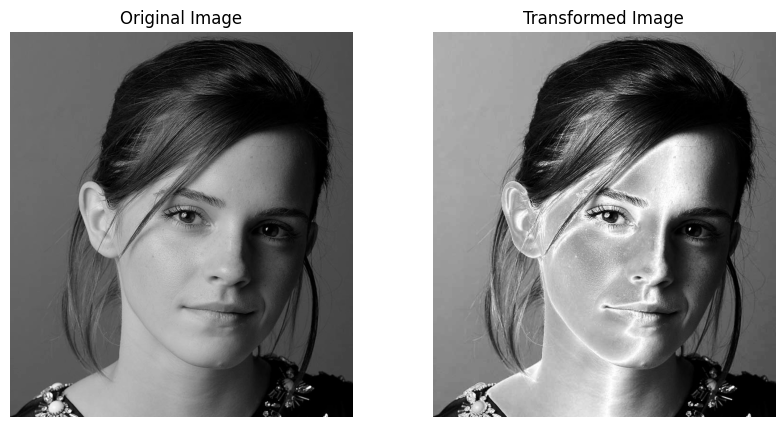

Original Image Range: 0.0 1.0
Scaled Image Range: 0 255
Transformed Image Range: 0 255


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the grayscale image
image = io.imread('./a1images/a1images/emma.jpg', as_gray=True)

# Ensure the image is in the range [0, 255] (scale from [0.0, 1.0])
image_scaled = (image * 255).astype(np.uint8)

# Define the intensity transformation function
def transform_intensity(I_in):
    if I_in < 50:
        return I_in
    elif I_in < 150:
        return 50 + 2.05 * (I_in - 50)
    elif I_in < 200:
        return 255 - 2.1 * (I_in - 150)
    else:
        return 150 + 1.909 * (I_in - 200)

# Apply the transformation to the scaled image
transformed_image = np.vectorize(transform_intensity)(image_scaled)

# Ensure the output intensities are within [0, 255]
transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

# Optionally, rescale the transformed image back to [0.0, 1.0] for visualization
transformed_image_rescaled = transformed_image / 255.0

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image_rescaled, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# Debugging prints
print("Original Image Range:", image.min(), image.max())
print("Scaled Image Range:", image_scaled.min(), image_scaled.max())
print("Transformed Image Range:", transformed_image.min(), transformed_image.max())